<h1 style="text-align: center; background: #152e45; color: white; padding: 15px 0">
    Mundo bajo el mar - Análisis de 7 tipos de mariscos en supermercado
</h1>

<h2 style="text-align: center; background: #08404e; color: white; padding: 15px 0; margin: 0"> Índice </h2>
<div style="background: #eefcff; color: black; padding: 15px 0">
    <ol>
        <li><a href='#rafa' style="color: black; text-decoration: none;">Hernández López Rafael</a></li>
        <ul>
            <li><a href='#algoritmo4' style="color: black; text-decoration: none;">Algoritmo a utilizar Bosques Aleatorios</a></li>
            <ul>
                 <li><a href='#alg_expl4' style="color: black; text-decoration: none;">Explicación del problema</a></li>
                 <li>
                     <a href='#alg_dic4' style="color: black; text-decoration: none;">
                     Construcción del diccionario de datos (significado y trascendencia de c/u)
                     </a>
                 </li>
             </ul>
            <li><a href='#preprocesamiento4' style="color: black; text-decoration: none;">Preprocesamiento</a></li>
            <ul>
             <li><a href='#perdidos4' style="color: black; text-decoration: none;">Manejo de datos perdidos</a></li>
             <ul>
                 <li><a href='#per_num4' style="color: black; text-decoration: none;">Numericos</a></li>
                 <li><a href='#per_cat4' style="color: black; text-decoration: none;">Categóricos</a></li>
             </ul>
             <li><a href='#cod_cat4' style="color: black; text-decoration: none;">Codificación de datos categóricos</a></li>
             <li><a href='#dis_cat4' style="color: black; text-decoration: none;">Discretización de datos numéricos</a></li>
             <li><a href='#atipicos4' style="color: black; text-decoration: none;">Manejo de valores atípicos</a></li>
             <ul>
                 <li><a href='#at_graf4' style="color: black; text-decoration: none;">Graficación de valores atípicos</a></li>
                 <li><a href='#at_est4' style="color: black; text-decoration: none;">Estrategia y aplicación de la misma sobre datos atípicos</a></li>
             </ul>
            </ul>
            <li><a href='#escalamiento4' style="color: black; text-decoration: none;">Escalamiento</a></li>
            <ul>
                <li><a href='#esc_raz4' style="color: black; text-decoration: none;">Razones para escalar</a></li>
                <li>
                    <a href='#esc_est4' style="color: black; text-decoration: none;">
                    Estrategia y aplicación del Escalamiento (Estandarización, Min/Max, escalamiento, etc.)
                    </a>
                </li>
            </ul>
            <li><a href='#aplicacion4' style="color: black; text-decoration: none;">Aplicación del algoritmo</a></li>
            <li><a href='#evaluacion4' style="color: black; text-decoration: none;">Evaluación del algoritmo</a></li>
            <li><a href='#validacion4' style="color: black; text-decoration: none;">Validación Cruzada</a></li>
        </ul>
    </ol>
</div>

<a id="rafa">
<h2 style="text-align: center; background: #1d4630; color: white; padding: 15px 0; margin: 0"> 
    Hernández López Rafael 
</h2>

### Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Cargamos el conjunto de datos

In [2]:
df_mariscos = pd.read_csv('equipo1.csv', sep=',')
df_mariscos.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Observamos cuantas filas y columnas tiene

In [3]:
df_mariscos.shape

(159, 7)

Analizamos de manera aleatoria nuestro conjunto de datos

In [4]:
df_mariscos.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
89,Perch,135.0,20.0,22.0,23.5,5.8750,3.5250
87,Perch,120.0,20.0,22.0,23.5,5.6400,3.5250
47,Roach,160.0,21.1,22.5,25.0,6.4000,3.8000
44,Roach,145.0,20.5,22.0,24.3,6.6339,3.5478
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720
25,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340


<a id="algoritmo4">
<h3 style="text-align: center; background: #16633b; color: white; padding: 15px 0; margin: 0"> 
    Algoritmo a utilizar Bosques Aleatorios
</h3>

<a id="alg_expl4">
<h4 style="text-align: center; background: #049346; color: white; padding: 15px 0; margin: 0"> 
    Explicación del problema
</h4>

<p style="text-align: justify;">Este conjunto de datos contiene información sobre siete especies diferentes de mariscos, con características físicas como peso, longitud, altura y ancho. El objetivo es construir un modelo utilizando Bosques Aleatorios (Random Forest) para predecir la especie del marisco basándose en sus características. Este es un problema de clasificación supervisada, donde la etiqueta de salida es la columna Species.</p>

<a id="alg_dic4">
<h4 style="text-align: center; background: #049346; color: white; padding: 15px 0; margin: 0"> 
    Construcción del diccionario de datos (significado y trascendencia de c/u)
</h4>

<table>
        <thead>
            <tr>
                <th>Columna</th>
                <th>Descripción</th>
                <th>Trascendencia</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Species</td>
                <td>Especie del marisco (Perch, Smelt, Bream, etc.).</td>
                <td>Es la variable objetivo del problema.</td>
            </tr>
            <tr>
                <td>Weight</td>
                <td>Peso del marisco en gramos.</td>
                <td>Es una característica clave para diferenciar las especies, ya que cada una tiene rangos típicos de peso.</td>
            </tr>
            <tr>
                <td>Length1</td>
                <td>Longitud desde la punta de la cabeza hasta el final (primer medida).</td>
                <td>Contribuye a describir el tamaño del marisco.</td>
            </tr>
            <tr>
                <td>Length2</td>
                <td>Longitud máxima del marisco (segunda medida).</td>
                <td>Complementa la información del tamaño general.</td>
            </tr>
            <tr>
                <td>Length3</td>
                <td>Longitud diagonal del marisco (tercera medida).</td>
                <td>Da información adicional sobre la forma del cuerpo.</td>
            </tr>
            <tr>
                <td>Height</td>
                <td>Altura máxima del cuerpo (proporcional al tamaño).</td>
                <td>Útil para distinguir especies con formas más anchas o altas.</td>
            </tr>
            <tr>
                <td>Width</td>
                <td>Ancho máximo del cuerpo del marisco.</td>
                <td>Diferencia especies con cuerpos más delgados o robustos.
            </tr>
        </tbody>
    </table>

<a id="preprocesamiento4">
<h3 style="text-align: center; background: #16633b; color: white; padding: 15px 0; margin: 0"> 
    Preprocesamiento
</h3>

### Construimos nuestro diccionario

In [5]:
datadict = pd.DataFrame(df_mariscos.dtypes)
datadict.columns = ['Tipo']
print(datadict)

            Tipo
Species   object
Weight   float64
Length1  float64
Length2  float64
Length3  float64
Height   float64
Width    float64


<a id="perdidos4">
<h4 style="text-align: center; background: #049346; color: white; padding: 15px 0; margin: 0"> 
    Manejo de datos perdidos
</h4>

### Buscando datos perdidos y duplicados

In [6]:
numericos_df = df_mariscos.select_dtypes(include=['float64'])
categoricos_df = df_mariscos.select_dtypes(include=['object'])
print(f'Numéricos nulos: \n{numericos_df.isnull().sum()}')
print(f'Categoricos nulos: \n{categoricos_df.isnull().sum()}\n')

Numéricos nulos: 
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64
Categoricos nulos: 
Species    0
dtype: int64



### Agregamos la columna de datos perdidos y duplicados a nuestro diccionario

In [7]:
perdidos = df_mariscos.isnull().sum()
datadict['Perdidos'] = perdidos
print(datadict)

            Tipo  Perdidos
Species   object         0
Weight   float64         0
Length1  float64         0
Length2  float64         0
Length3  float64         0
Height   float64         0
Width    float64         0


In [8]:
duplicados = df_mariscos.duplicated().sum()
datadict['Duplicados'] = duplicados
datadict

,Tipo,Perdidos,Duplicados
Species,object,0,0
Weight,float64,0,0
Length1,float64,0,0
Length2,float64,0,0
Length3,float64,0,0
Height,float64,0,0
Width,float64,0,0


<a id="per_num4">
<h5 style="text-align: center; background: #c0ffda; color: black; padding: 15px 0; margin: 0"> 
    Numéricos
</h5>

<p sytle="text-align: justify;">Para imputar valores nulos con datos numéricos podemos usar la media, mediana, moda u alguna fórmula en específico, dependiendo de nuestro conjunto de datos, sin embargo, no encontramos ningún valor nulo, pero debido a que en nuestro conjunto de datos hayamos datos con valores igual a 0, entonces aplicamos la media para imputar ese valor.</p>

In [9]:
print(f'Numéricos nulos: \n{numericos_df.isnull().sum()}')

Numéricos nulos: 
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


### Aplicando algoritmo de imputación de datos nulos (si existieran)

In [10]:
from sklearn.impute import SimpleImputer

# Identificar valores nulos
missing_data = df_mariscos.isnull().sum()

# Imputación de datos numéricos
num_cols = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
num_imputer = SimpleImputer(strategy='mean')
df_mariscos[num_cols] = num_imputer.fit_transform(df_mariscos[num_cols])

### Identificando que columnas tienen algún valor en 0

In [11]:
zero = df_mariscos[df_mariscos.isin([0])].count()
datadict['Valores en 0'] = zero
datadict

,Tipo,Perdidos,Duplicados,Valores en 0
Species,object,0,0,0
Weight,float64,0,0,1
Length1,float64,0,0,0
Length2,float64,0,0,0
Length3,float64,0,0,0
Height,float64,0,0,0
Width,float64,0,0,0


### Imputando el valor en 0 con la mediana

In [12]:
mediana_weight = numericos_df['Weight'].median()
numericos_df['Weight'].replace(0, mediana_weight, inplace=True)
numericos_df[numericos_df.isin([0])].count()
df_mariscos.iloc[:,1:] = numericos_df

### Verificando que ya no exista níngun valor en 0

In [13]:
zero = df_mariscos[df_mariscos.isin([0])].count()
datadict['Valores en 0'] = zero
datadict

,Tipo,Perdidos,Duplicados,Valores en 0
Species,object,0,0,0
Weight,float64,0,0,0
Length1,float64,0,0,0
Length2,float64,0,0,0
Length3,float64,0,0,0
Height,float64,0,0,0
Width,float64,0,0,0


<a id="per_cat4">
<h5 style="text-align: center; background: #c0ffda; color: black; padding: 15px 0; margin: 0"> 
    Categóricos
</h5>

<p sytle="text-align: justify;">Para imputar valores nulos con datos categóricos podemos usar la moda u algún formula en específico, dependiendo de nuestro conjunto de datos, sin embargo, no fue necesario hacer esto, debido a que no teníamos ningún valor nulo.</p>

In [14]:
print(f'Categoricos nulos: \n{categoricos_df.isnull().sum()}\n')

Categoricos nulos: 
Species    0
dtype: int64



### Ejemplo si hubieran datos nulos

In [15]:
from sklearn.impute import SimpleImputer

# Identificar valores nulos
missing_data = df_mariscos.isnull().sum()

# Imputación de datos categóricos
cat_cols = ['Species']
cat_imputer = SimpleImputer(strategy='most_frequent')
df_mariscos[cat_cols] = cat_imputer.fit_transform(df_mariscos[cat_cols])

<a id="cod_cat4">
<h4 style="text-align: center; background: #049346; color: white; padding: 15px 0; margin: 0"> 
    Codificación de datos categóricos
</h4>

<p sytle="text-align: justify;">
No es necesario codificar la variable Species, ya que el modelo de Bosques Aleatorios puede manejar variables categóricas de forma interna. Sin embargo, si decidimos codificarla, no habría ningún inconveniente.
</p>

### Convertimos la variable categórica Species en un formato numérico usando Label Encoding.
Nota: También puede ser con One-Hot Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

# Codificación de la etiqueta Species con Label Encoding
label_encoder = LabelEncoder()
df_mariscos['Species'] = label_encoder.fit_transform(df_mariscos['Species'])

<a id="dis_cat4">
<h4 style="text-align: center; background: #049346; color: white; padding: 15px 0; margin: 0"> 
    Discretización de datos numéricos
</h4>

<p style="text-align: justify;"> 
No es necesario discretizar las variables numéricas, ya que el modelo de Bosques Aleatorios puede manejarlas directamente, aprovechando su capacidad para dividir y clasificar los datos en puntos de corte continuos. Aunque es posible agrupar variables continuas, como Weight, en categorías (por ejemplo, bajo, medio, alto) para facilitar algunos análisis, esto no es esencial para el algoritmo de Random Forest.
</p>

### Ejemplo si es que se discretizaran los datos

In [17]:
# Crear rangos de peso
bins = [0, 200, 600, float('inf')]  # Límites para los grupos
labels = ['Ligero', 'Mediano', 'Pesado']  # Nombres para los grupos

# Discretizar la columna Weight
df_mariscos['Weight_Category'] = pd.cut(df_mariscos['Weight'], bins=bins, labels=labels)

# Verificar resultados
print(df_mariscos[['Weight', 'Weight_Category']].sample(10))

     Weight Weight_Category
100   197.0          Ligero
150     8.7          Ligero
119   850.0          Pesado
44    145.0          Ligero
129   300.0         Mediano
70    273.0         Mediano
33    975.0          Pesado
113   700.0          Pesado
64    120.0          Ligero
153     9.8          Ligero


<p style="text-align: justify">Si se aplica esta discretización, la nueva columna Weight_Category debe ser codificada (por ejemplo, usando One-Hot Encoding) antes de ser usada en el modelo. Sin embargo, en algoritmos como Random Forest, es preferible trabajar con valores continuos, ya que pueden capturar mejor la relación entre el peso y la especie.</p>

In [18]:
df_mariscos.drop(['Weight_Category'], axis=1, inplace=True)

<a id="atipicos4">
<h4 style="text-align: center; background: #049346; color: white; padding: 15px 0; margin: 0"> 
    Manejo de valores atípicos
</h4>

<a id="at_graf4">
<h5 style="text-align: center; background: #c0ffda; color: black; padding: 15px 0; margin: 0"> 
    Graficación de valores atípicos
</h5>

### Creamos una función para graficar nuestros valores atípicos
La cual posteriormente sera utilizada como estrategía para eliminar o imputar los mismos.

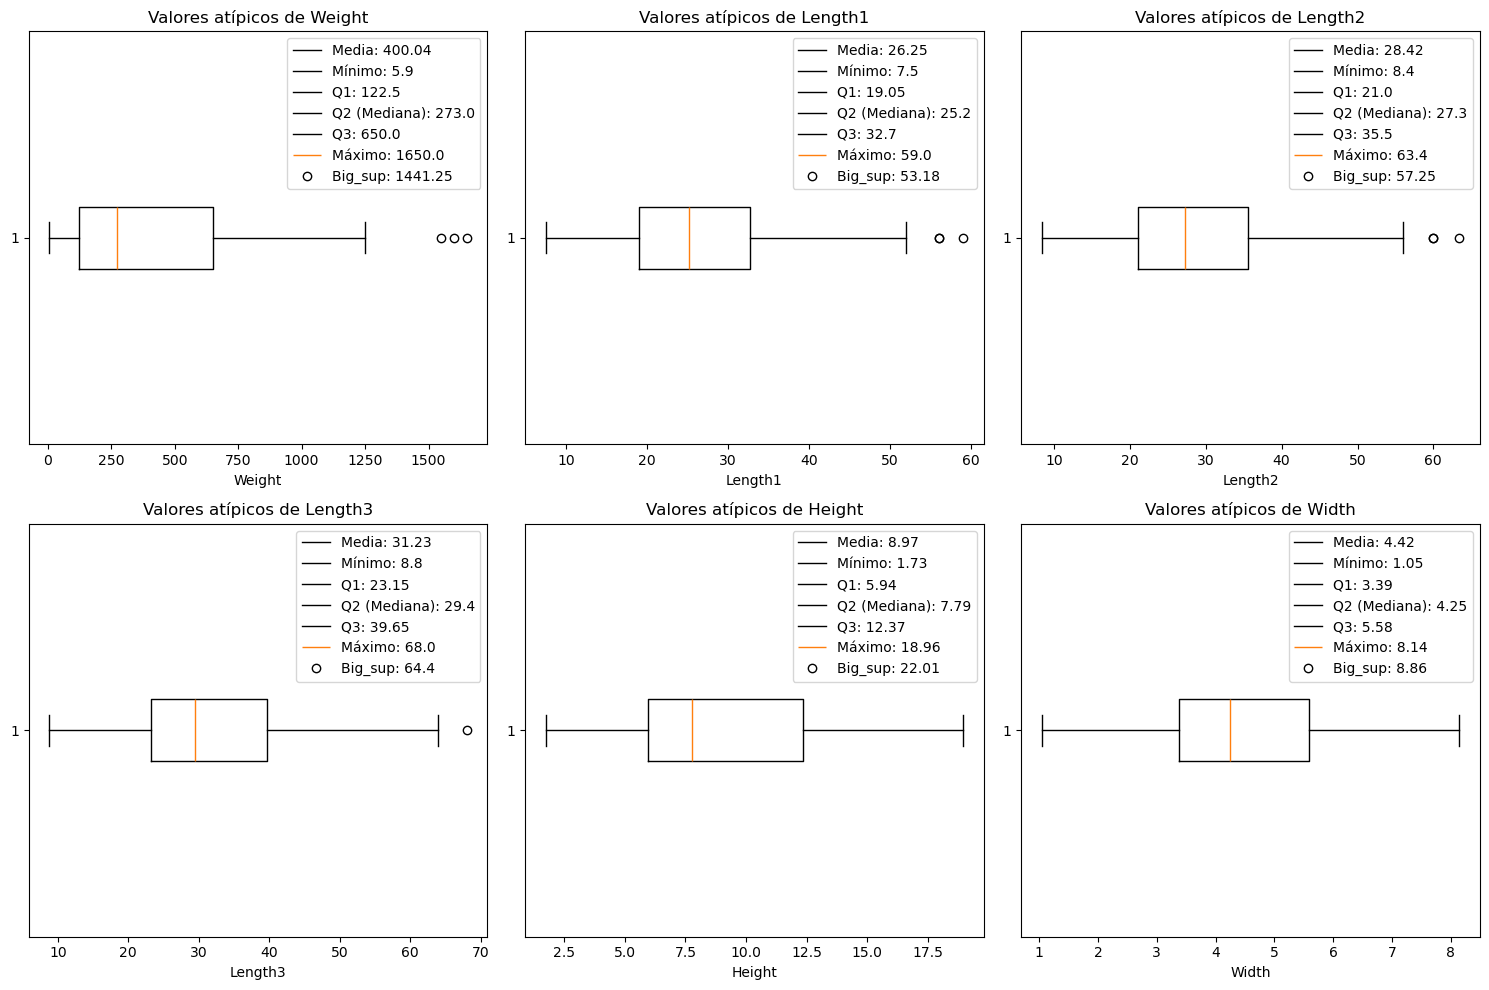

In [19]:
def diagramas_bigotes(df, columnas):
    bigotes = []
    
    # Define el número de filas y columnas
    n_filas = 2
    n_columnas = 3
    
    # Crea la figura con subgráficos
    fig, axes = plt.subplots(n_filas, n_columnas, figsize=(15, 10))  # Tamaño de la figura ajustado para 9 gráficos
    axes = axes.flatten()  # Convirtiendo los subgráficos en un solo array de 1D para poder indexarlos fácilmente

    for i, columna in enumerate(columnas):
        # Calcular estadísticas
        media = round(df[columna].mean(), 2)
        minimo = round(df[columna].min(), 2)
        maximo = round(df[columna].max(), 2)
        q1 = round(df[columna].quantile(0.25), 2)
        q2 = round(df[columna].quantile(0.50), 2)
        q3 = round(df[columna].quantile(0.75), 2)
        bigote_sup = round(q3 + 1.5 * (q3 - q1), 2)
        
        # Creando el boxplot en el subgráfico correspondiente
        axes[i].boxplot(df[columna], vert=False)
        
        # Agregar el título y las leyendas con las estadísticas
        axes[i].set_title(f'Valores atípicos de {columna}')
        leyenda = [
            f'Media: {media}',
            f'Mínimo: {minimo}',
            f'Q1: {q1}',
            f'Q2 (Mediana): {q2}',
            f'Q3: {q3}',
            f'Máximo: {maximo}',
            f'Big_sup: {bigote_sup}'
        ]
        # Agrega las leyendas
        axes[i].legend(leyenda, loc='upper right')
        axes[i].set_xlabel(f'{columna}')
        
        # Agrega el resultado de cada bigote superior a la lista
        bigotes.append(bigote_sup)

    # Ajusta la disposición para evitar solapamiento
    plt.tight_layout()
    
    # Muestra el gráfico
    plt.show()

    # Regresar el bigote superior
    return bigotes

columnas = df_mariscos.select_dtypes(include=['float64']).columns
bigotes_sup = diagramas_bigotes(df_mariscos, columnas)

<a id="at_est4">
<h5 style="text-align: center; background: #c0ffda; color: black; padding: 15px 0; margin: 0"> 
    Estrategia y aplicación de la misma sobre datos atípicos
</h5>

### Quitamos los valores atípicos
Debido a que no son muchos, se toma la decision de eliminarlos.

<p style="text-align:justify">Para ello, con el valor que nos retornó nuestra función acerca de cuál es el bigote superior de cada gráfica, la ocupamos como parámetro para poder eliminar los valores que estén fuera de nuestro bigote.</p>

In [20]:
for i, columna in enumerate(columnas):
    df_mariscos = df_mariscos[df_mariscos[columna] <= bigotes_sup[i]]

### Verificamos cuantas filas nos quedan después de eliminar los valores atípicos

In [21]:
df_mariscos.shape

(156, 7)

### Volvemos a graficar para comprobar que se han elimiando

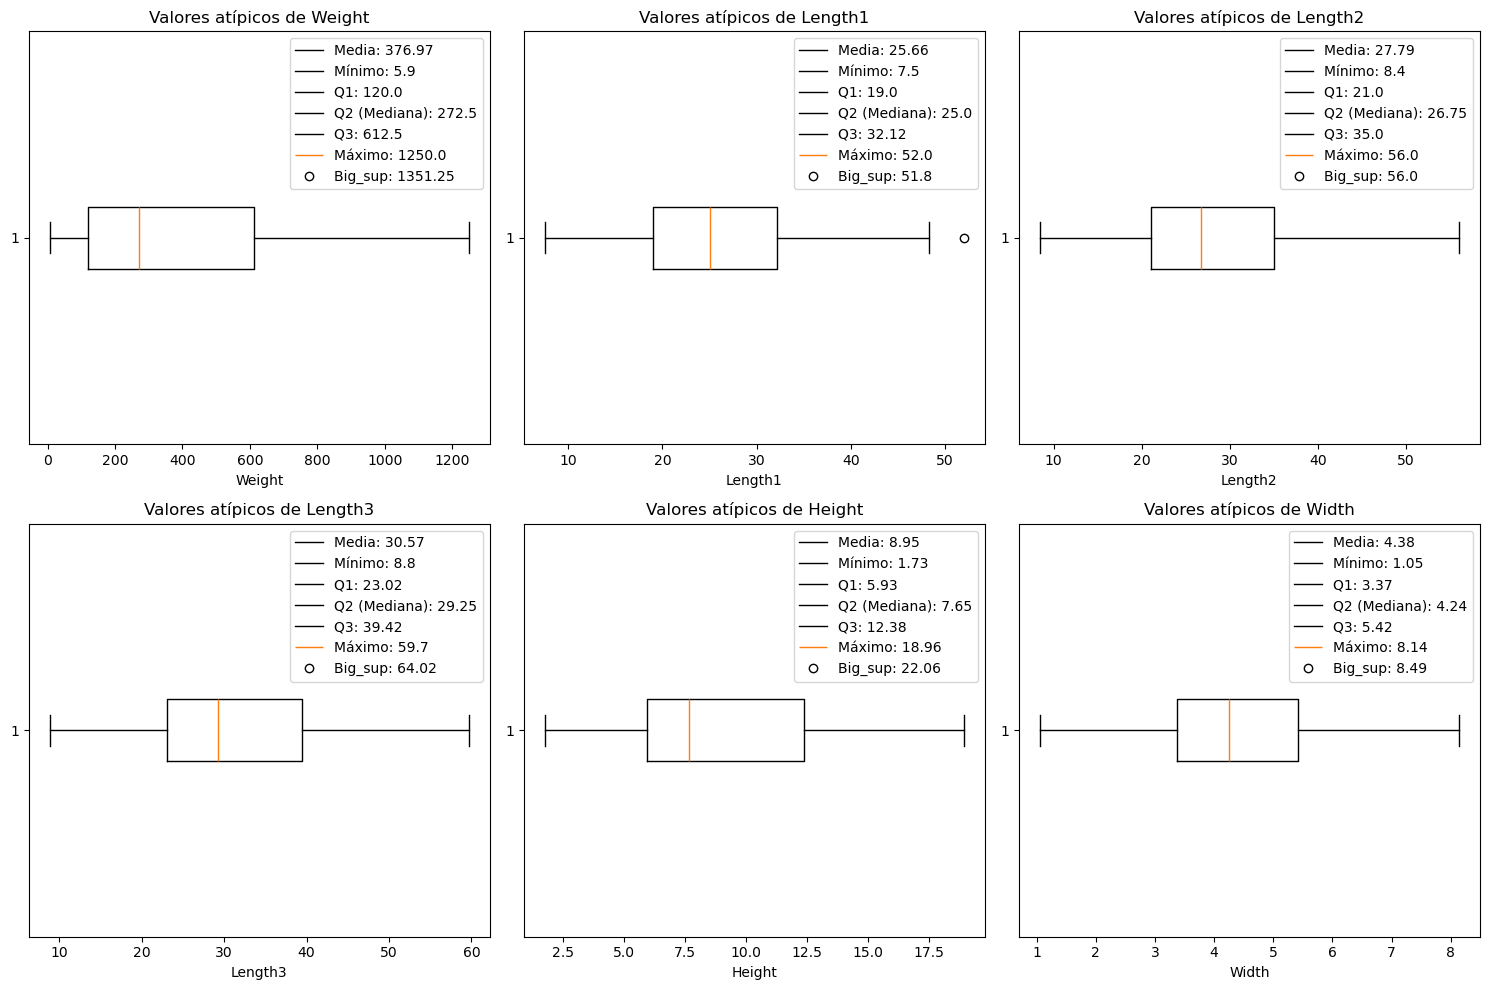

[1351.25, 51.8, 56.0, 64.02, 22.06, 8.49]

In [22]:
diagramas_bigotes(df_mariscos, columnas)

<a id="escalamiento4">
<h4 style="text-align: center; background: #049346; color: white; padding: 15px 0; margin: 0"> 
    Escalamiento
</h4>

<a id="esc_raz4">
<h5 style="text-align: center; background: #c0ffda; color: black; padding: 15px 0; margin: 0"> 
    Razones para escalar
</h5>

<p style="text-align:justify;">
Los algoritmos basados en distancias, como SVM y KNN, requieren escalamiento para evitar que las características con valores más grandes dominen en el cálculo. Aunque los modelos de Bosques Aleatorios (Random Forest) no son sensibles al escalamiento, en ciertos casos puede mejorar la estabilidad del modelo. Sin embargo, en este caso específico, no se aplicó escalamiento, ya que el modelo mostró una mayor precisión cuando los datos no fueron escalados.
</p>

<a id="esc_est4">
<h5 style="text-align: center; background: #c0ffda; color: black; padding: 15px 0; margin: 0"> 
    Estrategia y aplicación del Escalamiento (Estandarización, Min/Max, escalamiento, etc.)
</h5>

### Separamos en X e y

In [23]:
X_rf = df_mariscos.drop('Species', axis=1)
y_rf = df_mariscos['Species']

### Importamos la librearia de StandardScaler y escalamos los datos (de ser necesario)

In [24]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_rf = sc.fit_transform(X_rf)

<a id="aplicacion4">
<h3 style="text-align: center; background: #16633b; color: white; padding: 15px 0; margin: 0"> 
    Aplicación del algoritmo
</h3>

### Separamos en X e y

In [25]:
X_rf = df_mariscos.drop('Species', axis=1)
y_rf = df_mariscos['Species']

### Importamos la librería de train_test_split y creamos nuestras variables de prueba y entrenamiento 

In [26]:
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.30, random_state=42)

### Escalamos (de ser necesario)

In [27]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_rf = sc.fit_transform(X_train_rf)
# X_test_rf = sc.fit_transform(X_test_rf)

### Importamos la librería de RandomForestClassifier y creamos nuestro modelo

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo con 10 árboles de decisión
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)

### Entrenamos nuestro modelo

In [29]:
random_forest.fit(X_train_rf, y_train_rf)

RandomForestClassifier(n_estimators=10, random_state=42)

### Obtenemos el cálculo de las predicciones en Train y Test

In [30]:
y_train_pred_rf = random_forest.predict(X_train_rf)
y_test_pred_rf = random_forest.predict(X_test_rf)

<a id="evaluacion4">
<h3 style="text-align: center; background: #16633b; color: white; padding: 15px 0; margin: 0"> 
    Evaluación del algoritmo
</h3>

### Importamos la librería de accuracy_score y realizamos el cálculo de las métricas

In [31]:
from sklearn.metrics import accuracy_score

# Cálculo de accuracy en Train
train_accuracy_rf = accuracy_score(y_train_rf, y_train_pred_rf)

# Cálculo de accuracy en Test
test_accuracy_rf = accuracy_score(y_test_rf, y_test_pred_rf)

print(f'El accuracy en train es: {train_accuracy_rf*100:0.2f}%')
print(f'El accuracy en test es: {test_accuracy_rf*100:0.2f}%')

El accuracy en train es: 99.08%
El accuracy en test es: 80.85%


### Verificamos el feature importances y lo colocamos en un DataFrame

In [32]:
feature_importances_df = pd.DataFrame(
    {'feature': list(X_rf.columns), 'importance': random_forest.feature_importances_}
).sort_values('importance', ascending=False)

# Mostramos
feature_importances_df

,feature,importance
4,Height,0.371990
5,Width,0.180475
0,Weight,0.148091
3,Length3,0.117550
2,Length2,0.105054
1,Length1,0.076839


### Graficando el feature importances con ayuda de Seaborn y Matplotlib

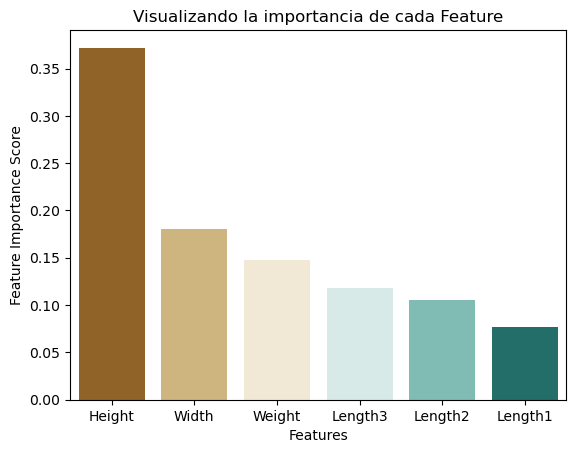

In [33]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance, hue=feature_importances_df.feature, palette='BrBG')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title('Visualizando la importancia de cada Feature')
plt.show()

### Importamos la librería de confusion_matrix y creamos la Matriz de confusión

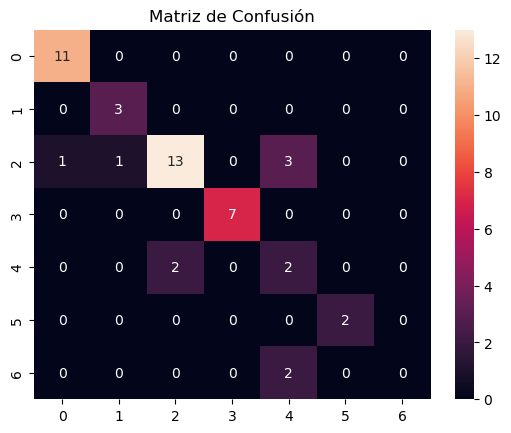

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_rf, y_test_pred_rf)

# Graficamos la matriz de confusión
ax = sns.heatmap(cm, annot=True, cbar=True)
ax.set_title('Matriz de Confusión')
plt.show()

### Importamos la librería de classification_report e imprimimos un reporte más detallado de nuestro algoritmo

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test_rf, y_test_pred_rf, zero_division=0))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.75      1.00      0.86         3
           2       0.87      0.72      0.79        18
           3       1.00      1.00      1.00         7
           4       0.29      0.50      0.36         4
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         2

    accuracy                           0.81        47
   macro avg       0.69      0.75      0.71        47
weighted avg       0.81      0.81      0.80        47



In [36]:
# Con Label encoder
print(classification_report(label_encoder.inverse_transform(y_test_rf), label_encoder.inverse_transform(y_test_pred_rf), zero_division=0))

              precision    recall  f1-score   support

       Bream       0.92      1.00      0.96        11
      Parkki       0.75      1.00      0.86         3
       Perch       0.87      0.72      0.79        18
        Pike       1.00      1.00      1.00         7
       Roach       0.29      0.50      0.36         4
       Smelt       1.00      1.00      1.00         2
   Whitefish       0.00      0.00      0.00         2

    accuracy                           0.81        47
   macro avg       0.69      0.75      0.71        47
weighted avg       0.81      0.81      0.80        47



<a id="validacion4">
<h3 style="text-align: center; background: #16633b; color: white; padding: 15px 0; margin: 0"> 
    Validación cruzada
</h3>

In [135]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest, X_rf, y_rf, cv=5)  # 5-fold cross-validation
scores_red = [f'{round(score, 2)},' for score in scores]
print("Puntajes por Fold:", *scores_red)
print(f"Bosques aleatorios - Precisión media: {scores.mean()*100:.2f}% (± {scores.std()*100:.2f})")

Puntajes por Fold: 0.28, 0.61, 0.52, 0.65, 0.39,
Bosques aleatorios - Precisión media: 48.85% (± 13.71)


### Conclusión
<p style='text-align:justify'>
El modelo de <b>bosques aleatorios</b> muestra un rendimiento deficiente, con una precisión promedio de 48.85%, que es ligeramente inferior a la de lanzar una moneda al aire. La alta variabilidad en los resultados (desviación estándar de 13.71) sugiere que el modelo es sensible a los datos de entrenamiento y podría no estar generalizando bien. Las precisiones varían entre 28% y 65% en los diferentes folds, lo que indica un rendimiento inconsistente. Esto sugiere que, a pesar de haber obtenido una buena precisión en el modelo de entrenamiento y validación, no significa que los datos se estén analizando correctamente, ya que la validación cruzada muestra una precisión mucho menor que la obtenida.
</p>